# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df=pd.DataFrame(mouse_metadata)
study_df=pd.DataFrame(study_results)

mouse_study_df=pd.merge(mouse_df, study_df, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(mouse_study_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#found source code for this on GeeksforGeeks website, was assisted as well by AskBCS Learning Assistant

duplicate = mouse_study_df.loc[mouse_study_df.duplicated(['Mouse ID', "Timepoint"]),"Mouse ID"].unique()
 
print("Duplicate Rows based on Mouse ID AND Timepoint:")
duplicate

Duplicate Rows based on Mouse ID AND Timepoint:


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study_df.loc[mouse_study_df["Mouse ID"]=="g989"]
 
print("Data for Duplicate Mouse")
duplicate_mouse

Data for Duplicate Mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df =mouse_study_df.drop(labels=range(908, 921), axis=0)
clean_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#This groupby code was sourced by an AskBCS Learning Assistant named Khan. Thanks Khan.

mean=clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance=clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev=clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sterror=clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_df=pd.DataFrame({"Mean Tumor Volume": mean,
                     "Median Tumor Volume:": median,
                     "Tumor Volumne Variance:": variance,
                     "Tumor Volume Standard Deviation:": stdev,
                     "Tumor Volume Standard Error:": sterror})
summary_df

,Mean Tumor Volume,Median Tumor Volume:,Tumor Volumne Variance:,Tumor Volume Standard Deviation:,Tumor Volume Standard Error:
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

print("I'll pass on this advanced method today. Thank you.")

I'll pass on this advanced method today. Thank you.


## Bar and Pie Charts

<Axes: xlabel='Drug'>

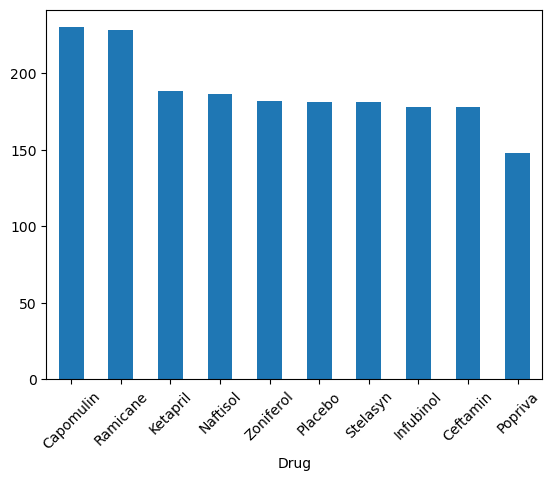

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_roundup=clean_mouse_study_df["Drug Regimen"].value_counts()
drug=['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Popriva']
mouse_count=[230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
regimen_roundup_df=pd.DataFrame({"Drug": drug,
                     "Mouse Count": mouse_count})

regimen_roundup_df.plot.bar(x="Drug", y="Mouse Count", rot=45, legend=False)

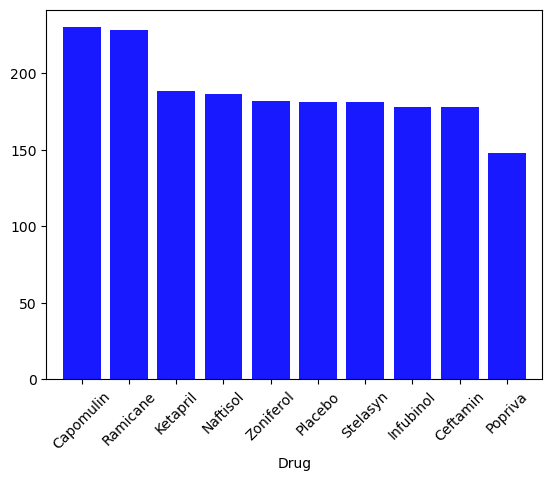

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_count = regimen_roundup_df['Mouse Count']
x_axis = regimen_roundup_df['Drug']
plt.xticks(rotation=45)
plt.bar(x_axis, mouse_count, color='b', alpha=0.9, align="center")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Drug")
plt.show()

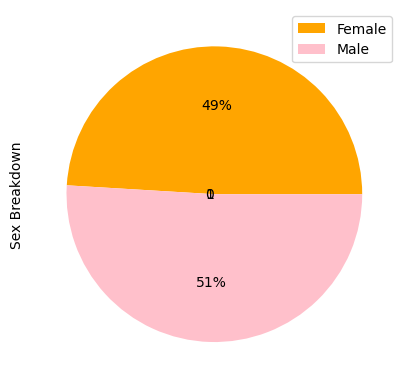

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_roundup=clean_mouse_study_df["Sex"].value_counts()

sex=['Female', 'Male']
mf_count=[922, 958]
sex_roundup_df=pd.DataFrame({"Sex": sex,
                     "Mouse Count": mf_count})

sex_roundup_df.plot.pie(x="Drug", y="Mouse Count", ylabel="Sex Breakdown", autopct='%1.0f%%', colors = ['orange', 'pink',], legend=True, labeldistance=0)
plt.legend(["Female", "Male"])

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mf_count, labels=labels, colors=['orange', 'pink'], shadow=False, startangle=140)
plt.show()

NameError: name 'labels' is not defined

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
